работа: $Eldan$ $Abdrashim$

### Импортирование нужных библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

#### Загрузка данных

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

#### Визуализация данных

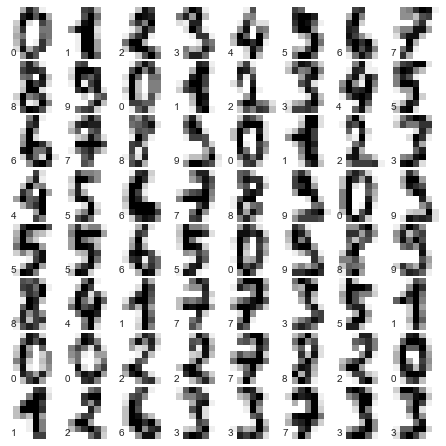

In [3]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

#### Task: 
    
    Split data on train and test sets 
    
    Knn models +
    
    Train both Decision Tree and Random Forest models
    
    Calculate precision, recall and F-score
    
    Tune parameters for each of these models using grid search
    
    Conclusion

## Решение

### Train Test Split 
#### Используем train_test_split чтобы разделить training set и a testing set.

In [4]:
from sklearn.model_selection import train_test_split

#### Деление данных на train и test

In [5]:
X = digits.data # Репрезентация матрицы пикселей в однамерном массива
y = digits.target # Наша цель для предсказывании 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.9)

#### Используем  из sklearn.metrics  classification_report и confusion_matrix для информации

In [6]:
from sklearn.metrics import classification_report, confusion_matrix

## Решение с помощью KNN 

#### Импортирование библиотеки KNeighborsClassifier

In [7]:
from sklearn.neighbors import KNeighborsClassifier

### Обучение KNeighborsClassifier

In [8]:
error_rate = []

for k in range(1, 20):
    knn = KNeighborsClassifier(n_jobs = -1, n_neighbors = k)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    print("Classification Report with k = {} neighbors".format(k))
    print(classification_report(y_test, pred))
    print("Confusion matrix for k = {} neighbors".format(k))
    print(confusion_matrix(y_test, pred))
    error_rate.append(np.mean(pred != y_test))
    print("")

Classification Report with k = 1 neighbors
             precision    recall  f1-score   support

          0       0.99      0.99      0.99       163
          1       0.90      0.97      0.94       160
          2       1.00      0.90      0.95       161
          3       0.92      0.96      0.94       166
          4       0.98      0.96      0.97       164
          5       0.99      0.96      0.98       168
          6       0.99      0.99      0.99       162
          7       0.96      1.00      0.98       158
          8       0.84      0.89      0.86       156
          9       0.94      0.84      0.89       160

avg / total       0.95      0.95      0.95      1618

Confusion matrix for k = 1 neighbors
[[162   0   0   0   1   0   0   0   0   0]
 [  0 156   0   0   2   0   0   0   2   0]
 [  0   1 145   3   0   0   0   1  11   0]
 [  0   0   0 160   0   0   0   0   3   3]
 [  0   1   0   0 158   0   1   1   3   0]
 [  0   0   0   1   1 162   1   0   1   2]
 [  2   0   0   0   0  

Classification Report with k = 9 neighbors
             precision    recall  f1-score   support

          0       0.95      1.00      0.97       163
          1       0.84      0.98      0.91       160
          2       0.99      0.94      0.96       161
          3       0.91      0.89      0.90       166
          4       0.99      0.88      0.93       164
          5       0.97      0.82      0.89       168
          6       0.93      0.99      0.96       162
          7       0.90      1.00      0.95       158
          8       0.89      0.80      0.84       156
          9       0.81      0.84      0.82       160

avg / total       0.92      0.91      0.91      1618

Confusion matrix for k = 9 neighbors
[[163   0   0   0   0   0   0   0   0   0]
 [  0 157   1   0   0   0   2   0   0   0]
 [  0   2 151   1   0   0   0   1   5   1]
 [  0   1   0 148   0   0   0   5   4   8]
 [  4   5   0   0 145   0   5   3   2   0]
 [  3   0   0   2   2 137   3   0   0  21]
 [  1   0   0   0   0  

Classification Report with k = 17 neighbors
             precision    recall  f1-score   support

          0       0.92      0.99      0.95       163
          1       0.81      0.90      0.85       160
          2       0.96      0.91      0.94       161
          3       0.90      0.88      0.89       166
          4       0.97      0.84      0.90       164
          5       0.93      0.76      0.84       168
          6       0.87      0.99      0.93       162
          7       0.88      0.99      0.93       158
          8       0.86      0.76      0.81       156
          9       0.77      0.81      0.79       160

avg / total       0.89      0.88      0.88      1618

Confusion matrix for k = 17 neighbors
[[162   0   0   0   1   0   0   0   0   0]
 [  0 144   5   1   0   0   5   0   5   0]
 [  2   3 147   1   0   0   0   2   6   0]
 [  2   2   0 146   0   0   1   5   5   5]
 [  3   8   0   0 138   0  10   4   1   0]
 [  4   1   0   4   3 127   4   0   0  25]
 [  1   0   0   0   0

### Рисуем график для KNeighborsClassifier из error_rate для наглядности 

Text(0,0.5,'Error Rate')

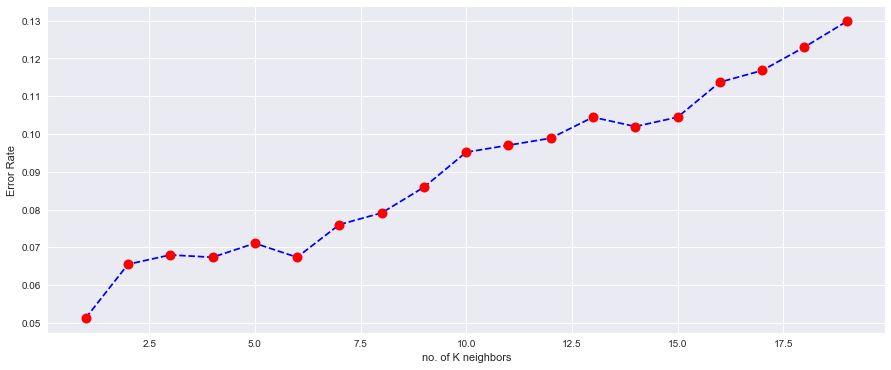

In [9]:
plt.figure(figsize=(15,6))
plt.plot(range(1,20),error_rate,color='blue',linestyle='dashed',marker='o', markerfacecolor='red', markersize='10')
plt.xlabel('no. of K neighbors')
plt.ylabel('Error Rate')

### Вывод по KNeighborsClassifier
Очень хорошие показатели для предсказывании чисел. Но, можно заметит по график что, количество К соседей влияет на качество очень сильно

## Решение с помощью Random Forest

#### Импортирование библиотеки RandomForestClassifier

In [10]:
from sklearn.ensemble import RandomForestClassifier

### Обучение Random Forest

In [11]:
error_rate = []
for depth in range(1, 10):
    clf = RandomForestClassifier(n_jobs = -1, max_depth = depth)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    print("Classification Report with k = {} depth".format(depth))
    print(classification_report(y_test, pred))
    print("Confusion matrix for k = {} depth".format(depth))
    print(confusion_matrix(y_test, pred))
    error_rate.append(np.mean(pred != y_test))
    print("")

Classification Report with k = 1 depth
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       163
          1       0.29      0.21      0.24       160
          2       0.48      0.58      0.53       161
          3       0.00      0.00      0.00       166
          4       0.46      0.51      0.48       164
          5       1.00      0.07      0.13       168
          6       0.49      0.98      0.65       162
          7       0.31      0.98      0.47       158
          8       0.10      0.04      0.06       156
          9       0.35      0.47      0.40       160

avg / total       0.35      0.38      0.30      1618

Confusion matrix for k = 1 depth
[[  0   7   0   0  65   0   2  17  42  30]
 [  0  33   3   1  13   0  36  54   0  20]
 [  0   8  93   3   0   0  14  41   0   2]
 [  0   5  89   0   0   0   6  35   0  31]
 [  0   5   0   0  83   0  37  37   0   2]
 [  0   2   2   0   2  12  66  58   1  25]
 [  0   0   0   0   3   0 158  

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report with k = 2 depth
             precision    recall  f1-score   support

          0       0.94      0.93      0.93       163
          1       0.34      0.56      0.42       160
          2       0.74      0.53      0.62       161
          3       0.78      0.49      0.61       166
          4       0.72      0.71      0.72       164
          5       1.00      0.20      0.34       168
          6       0.58      0.96      0.72       162
          7       0.52      0.96      0.68       158
          8       0.50      0.01      0.01       156
          9       0.48      0.66      0.56       160

avg / total       0.66      0.60      0.56      1618

Confusion matrix for k = 2 depth
[[151   0   0   0   1   0   5   2   0   4]
 [  0  89  12   0   8   0  34  13   0   4]
 [  0  11  86  12   0   0  23   2   0  27]
 [  1  13  11  82   2   0   4   8   1  44]
 [  7  10   0   0 117   0  15  15   0   0]
 [  0  13   1   1  11  34  24  58   0  26]
 [  0   0   0   0   7   0 155  

### Рисуем график для RandomForestClassifier из error_rate для наглядности 

Text(0,0.5,'Error Rate')

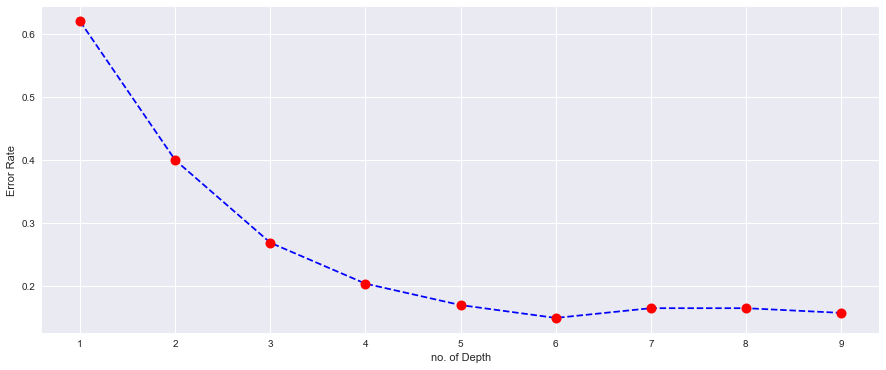

In [12]:
plt.figure(figsize=(15,6))
plt.plot(range(1, 10),error_rate,color='blue',linestyle='dashed',marker='o', markerfacecolor='red', markersize='10')
plt.xlabel('no. of Depth')
plt.ylabel('Error Rate')

### Вывод по RandomForestClassifier
Смотря на $RandomForestClassifier$ график, самая оптимальная глубина(depth) является 7, для минимального коэффициента ошибки

## Решение с помощью Decision Tree

#### Импортирование библиотеки  DecisionTreeClassifier

In [13]:
from sklearn.tree import DecisionTreeClassifier

### Обучение Decision Tree

In [14]:
df = pd.Series(y_train)
df2 = pd.Series(y_test)
df.value_counts()

1    22
7    21
9    20
6    19
8    18
4    17
3    17
2    16
0    15
5    14
dtype: int64

In [15]:
df2.value_counts()

5    168
3    166
4    164
0    163
6    162
2    161
9    160
1    160
7    158
8    156
dtype: int64

In [16]:
error_rate = []
max_features_list = ['int', 'log2', 'sqrt']
for depth in range(1, 20):
    d_clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = depth)
    d_clf.fit(X_train, y_train)
    pred = d_clf.predict(X_test)
    print("Classification Report with k = {} depth".format(depth))
    print(classification_report(y_test, pred))
    print("Confusion matrix for k = {} depth".format(depth))
    print(confusion_matrix(y_test, pred))
    error_rate.append(np.mean(pred != y_test))
    print("")

Classification Report with k = 1 depth
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       163
          1       0.00      0.00      0.00       160
          2       0.00      0.00      0.00       161
          3       0.00      0.00      0.00       166
          4       0.00      0.00      0.00       164
          5       0.00      0.00      0.00       168
          6       0.18      1.00      0.31       162
          7       0.00      0.00      0.00       158
          8       0.00      0.00      0.00       156
          9       0.21      0.94      0.34       160

avg / total       0.04      0.19      0.06      1618

Confusion matrix for k = 1 depth
[[  0   0   0   0   0   0 163   0   0   0]
 [  0   0   0   0   0   0  72   0   0  88]
 [  0   0   0   0   0   0  85   0   0  76]
 [  0   0   0   0   0   0  27   0   0 139]
 [  0   0   0   0   0   0 144   0   0  20]
 [  0   0   0   0   0   0  22   0   0 146]
 [  0   0   0   0   0   0 162  

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Рисуем график для DecisionTreeClassifier из error_rate для наглядности 

Text(0,0.5,'Error Rate')

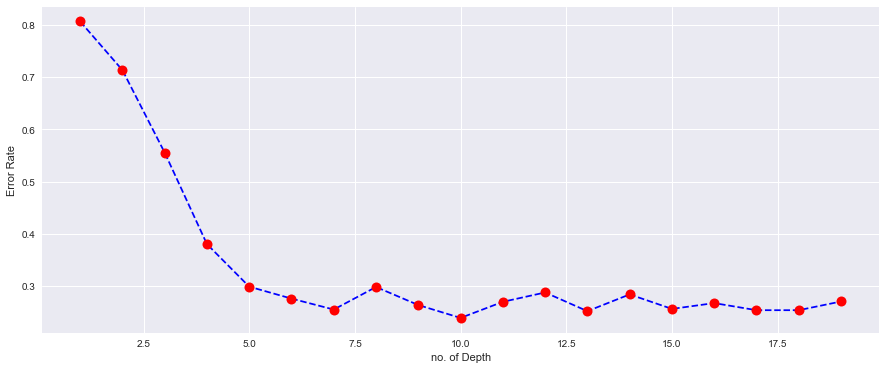

In [17]:
plt.figure(figsize=(15,6))
plt.plot(range(1, 20),error_rate,color='blue',linestyle='dashed',marker='o', markerfacecolor='red', markersize='10')
plt.xlabel('no. of Depth')
plt.ylabel('Error Rate')

### Вывод по DecisionTreeClassifier
Можем заметит, что $DecisionTreeClassifier$ не зависит от глубины

### Вывод

Как мы видем на выводе из $Classification Report$, наилучшее результат мы получили при помощи классификации алгоритма $KNeighborsClassifier$.
У алгоритмов как $Decision Tree$ и $Random Forest$ почти одинаковый ответ, думаю так как основа полагателем алгоритма $Random Forest$ является $Decision Tree$